# Big Foot Data Analytics Project
Ellis Chen  
05/02/2023

## From Homework 5

#### Link to Dataset

https://data.world/timothyrenner/bfro-sightings-data

#### Description of what each observation of the dataset represents
Each observation represents details about a Big Foot sighting

#### Description of what each variable in the dataset represents

|Variable|Description|
|:-------|:----------|
|observed|text about witness observations|
|location_details|text describing location of sighting|
|country|country name|
|state|state name|
|season|season of the year|
|title|number and title of report|
|latitude|quantitative coordinates|
|longitude|quantitative coordinates|
|date|date of the report|
|classification|subjective ranking of sighting credability|
|geohash|geohash of sighting location (may not use)|
|temperature_high|quantitative measure of temperature in deg F|
|temperature_mid|quantitative measure of temperature in deg F|
|temperature_low|quantitative measure of temperature in deg F|
|dew_point|quantitative measure of dew point in deg F|
|cloud_cover|percentage of cloud cover|
|moon_phase|fractional part of the lunation number (0.5 is a full moon)|
|precip_intensity|quantitative measure of preciptation in inches|
|precip_probability|chance of preciptation|
|precip_type|indicates type of precipitation|
|pressure|measure of atmospheric pressure in millibars|
|conditions|one or more adjectives describing weather condition|
|uv index|measure of UV|
|visibility|distance of visibility measured in miles|
|wind_bearing|the direction of the wind is coming from in degrees|
|wind_speed|quantitative measure of wind speed in mph|

#### Motivation
I find this dataset interesting because I want to figure out the perfect conditions for a big foot sighting.

Other potentially helpful links:  
http://www.bfro.net/gdb/classify.asp  
https://github.com/timothyrenner/bfro_sightings_data

## From Homework 6

### Project Questions: Bigfoot Sightings  

1. Which season sees the greatest number of reports?  

2. Is it possible to pinpoint the location of most frequent sightings?  

3. Do weather conditions impact the number of reports?  

4. How does visibility impact sightings?  

5. Do frequency of sightings change as atmospheric pressure changes?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model, model_selection, metrics, cluster

In [2]:
bigfoot = pd.read_csv("bfro_reports_geocoded.csv")
bigfoot

observed   
0     I am not sure how relevant this report will be...  \
1     I don't know if what I saw was two bigfoots or...   
2     My family and I went to Ludlow, Vermont for Co...   
3     It was spring break 1984 and I was 16 at the t...   
4     It was the winter of 1996 and we were on our w...   
...                                                 ...   
5077  while camping protecting other equipment befor...   
5078  I was on my way to work on a Saturday morning ...   
5079  On the twenty sixth and again on the twenty se...   
5080  I was hunting on me and my neighbor's property...   
5081  I was riding with a friend in the summer of 19...   

                                       location_details   
0     We were on our way to Rapid City, so we were h...  \
1     Heading to the deep mine Poca #2, the airshaft...   
2     It's off Rt 100 outside of Ludlow Vermont. It ...   
3     Wythe county Virginia near Wytheville, looking...   
4     Hwy 182, Wood County Between Quitman, Texas an...   
...                                                 ...   
5077                                         (withheld)   
5078  Laurel, Maryland.  It was sighted off of Rt 19...   
5079  head n.on highway 441 from Orlando,then go eas...   
5080  It was on my neighbor's property in the woods ...   
5081  This happened on the Mississippi River Road in...   

                      county          state  season   
0            Washakie County        Wyoming  Summer  \
1             Wyoming County  West Virginia  Winter   
2             Windsor County        Vermont    Fall   
3               Wythe County       Virginia  Spring   
4                Wood County          Texas  Winter   
...                      ...            ...     ...   
5077       Rio Arriba County     New Mexico  Summer   
5078  Prince George's County       Maryland  Spring   
5079             Lake County        Florida  Summer   
5080            White County       Illinois    Fall   
5081          Calhoun County       Illinois  Summer   

                                                  title  latitude  longitude   
0                                                   NaN       NaN        NaN  \
1     Report 13237: Daylight sighting near an abando...  37.58135  -81.29745   
2     Report 13285: Evening sighting by motorists on...  43.46540  -72.70510   
3     Report 2285: Boy sees "Bigfoot" in the woods w...  37.22647  -81.09017   
4     Report 2048: Night time road crossing observation  32.79430  -95.54250   
...                                                 ...       ...        ...   
5077                                                NaN       NaN        NaN   
5078                                                NaN       NaN        NaN   
5079                                                NaN       NaN        NaN   
5080                                                NaN       NaN        NaN   
5081                                                NaN       NaN        NaN   

            date   number  ... precip_intensity precip_probability   
0            NaN    798.0  ...              NaN                NaN  \
1     2005-12-03  13237.0  ...            0.204              100.0   
2     2005-10-08  13285.0  ...            3.208              100.0   
3     1984-04-08   2285.0  ...            0.000                0.0   
4     1996-12-22   2048.0  ...              NaN                0.0   
...          ...      ...  ...              ...                ...   
5077         NaN  11992.0  ...              NaN                NaN   
5078         NaN   1171.0  ...              NaN                NaN   
5079         NaN  30267.0  ...              NaN                NaN   
5080         NaN  59058.0  ...              NaN                NaN   
5081         NaN  39827.0  ...              NaN                NaN   

           precip_type  pressure   
0                  NaN       NaN  \
1     ['rain', 'snow']    1018.7   
2             ['rain']    1011.8   
3                  NaN

In [3]:
bigfoot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   observed            5043 non-null   object 
 1   location_details    4318 non-null   object 
 2   county              5082 non-null   object 
 3   state               5082 non-null   object 
 4   season              5082 non-null   object 
 5   title               4104 non-null   object 
 6   latitude            4104 non-null   float64
 7   longitude           4104 non-null   float64
 8   date                4104 non-null   object 
 9   number              5082 non-null   float64
 10  classification      5082 non-null   object 
 11  geohash             4104 non-null   object 
 12  temperature_high    4102 non-null   float64
 13  temperature_mid     3964 non-null   float64
 14  temperature_low     4102 non-null   float64
 15  dew_point           3951 non-null   float64
 16  humidi

In [4]:
bigfoot.describe()

latitude    longitude        number  temperature_high   
count  4104.000000  4104.000000   5082.000000       4102.000000  \
mean     39.376485   -97.373051  22125.058245         66.430668   
std       5.690414    16.770629  19942.008403         21.255399   
min      25.141000  -167.131000     60.000000          0.000000   
25%      35.344228  -117.045675   4669.750000         55.300000   
50%      39.323175   -91.667610  15880.500000         70.700000   
75%      43.977362   -83.001840  35263.500000         82.100000   
max      64.891390   -68.228300  75577.000000        109.500000   

       temperature_mid  temperature_low    dew_point     humidity   
count      3964.000000      4102.000000  3951.000000  3951.000000  \
mean         58.597805        47.308313    46.458871    68.417565   
std          16.112877        18.052011    16.365148    15.717824   
min          -3.200000       -17.600000   -13.300000     7.800000   
25%          47.600000        36.600000    35.400000    59.600000   
50%          60.300000        49.100000    47.200000    70.800000   
75%          71.300000        60.700000    58.900000    79.500000   
max          96.100000        91.100000    78.100000   100.000000   

       cloud_cover   moon_phase  precip_intensity  precip_probability   
count  3939.000000  4104.000000       3524.000000         3964.000000  \
mean     45.265524     0.483370          0.092466           32.996973   
std      32.949511     0.288455          0.284238           47.026109   
min       0.000000     0.000000          0.000000            0.000000   
25%      15.000000     0.250000          0.000000            0.000000   
50%      42.700000     0.480000          0.000000            0.000000   
75%      74.700000     0.750000          0.034000          100.000000   
max     100.000000     0.980000          5.781000          100.000000   

          pressure    uv_index   visibility  wind_bearing   wind_speed  
count  3678.000000  394.000000  3916.000000   3955.000000  3966.000000  
mean   1016.972838    6.461929    10.379775    198.565209    12.624559  
std       6.079381    2.640422     5.788451     98.553333     5.000741  
min     980.400000    0.000000     0.000000      0.100000     0.000000  
25%    1013.300000    4.000000     8.200000    129.450000     9.200000  
50%    1016.800000    7.000000     9.600000    205.700000    11.800000  
75%    1020.400000    9.000000     9.900000    282.300000    15.200000  
max    1042.200000   10.000000    74.600000    360.000000    55.000000

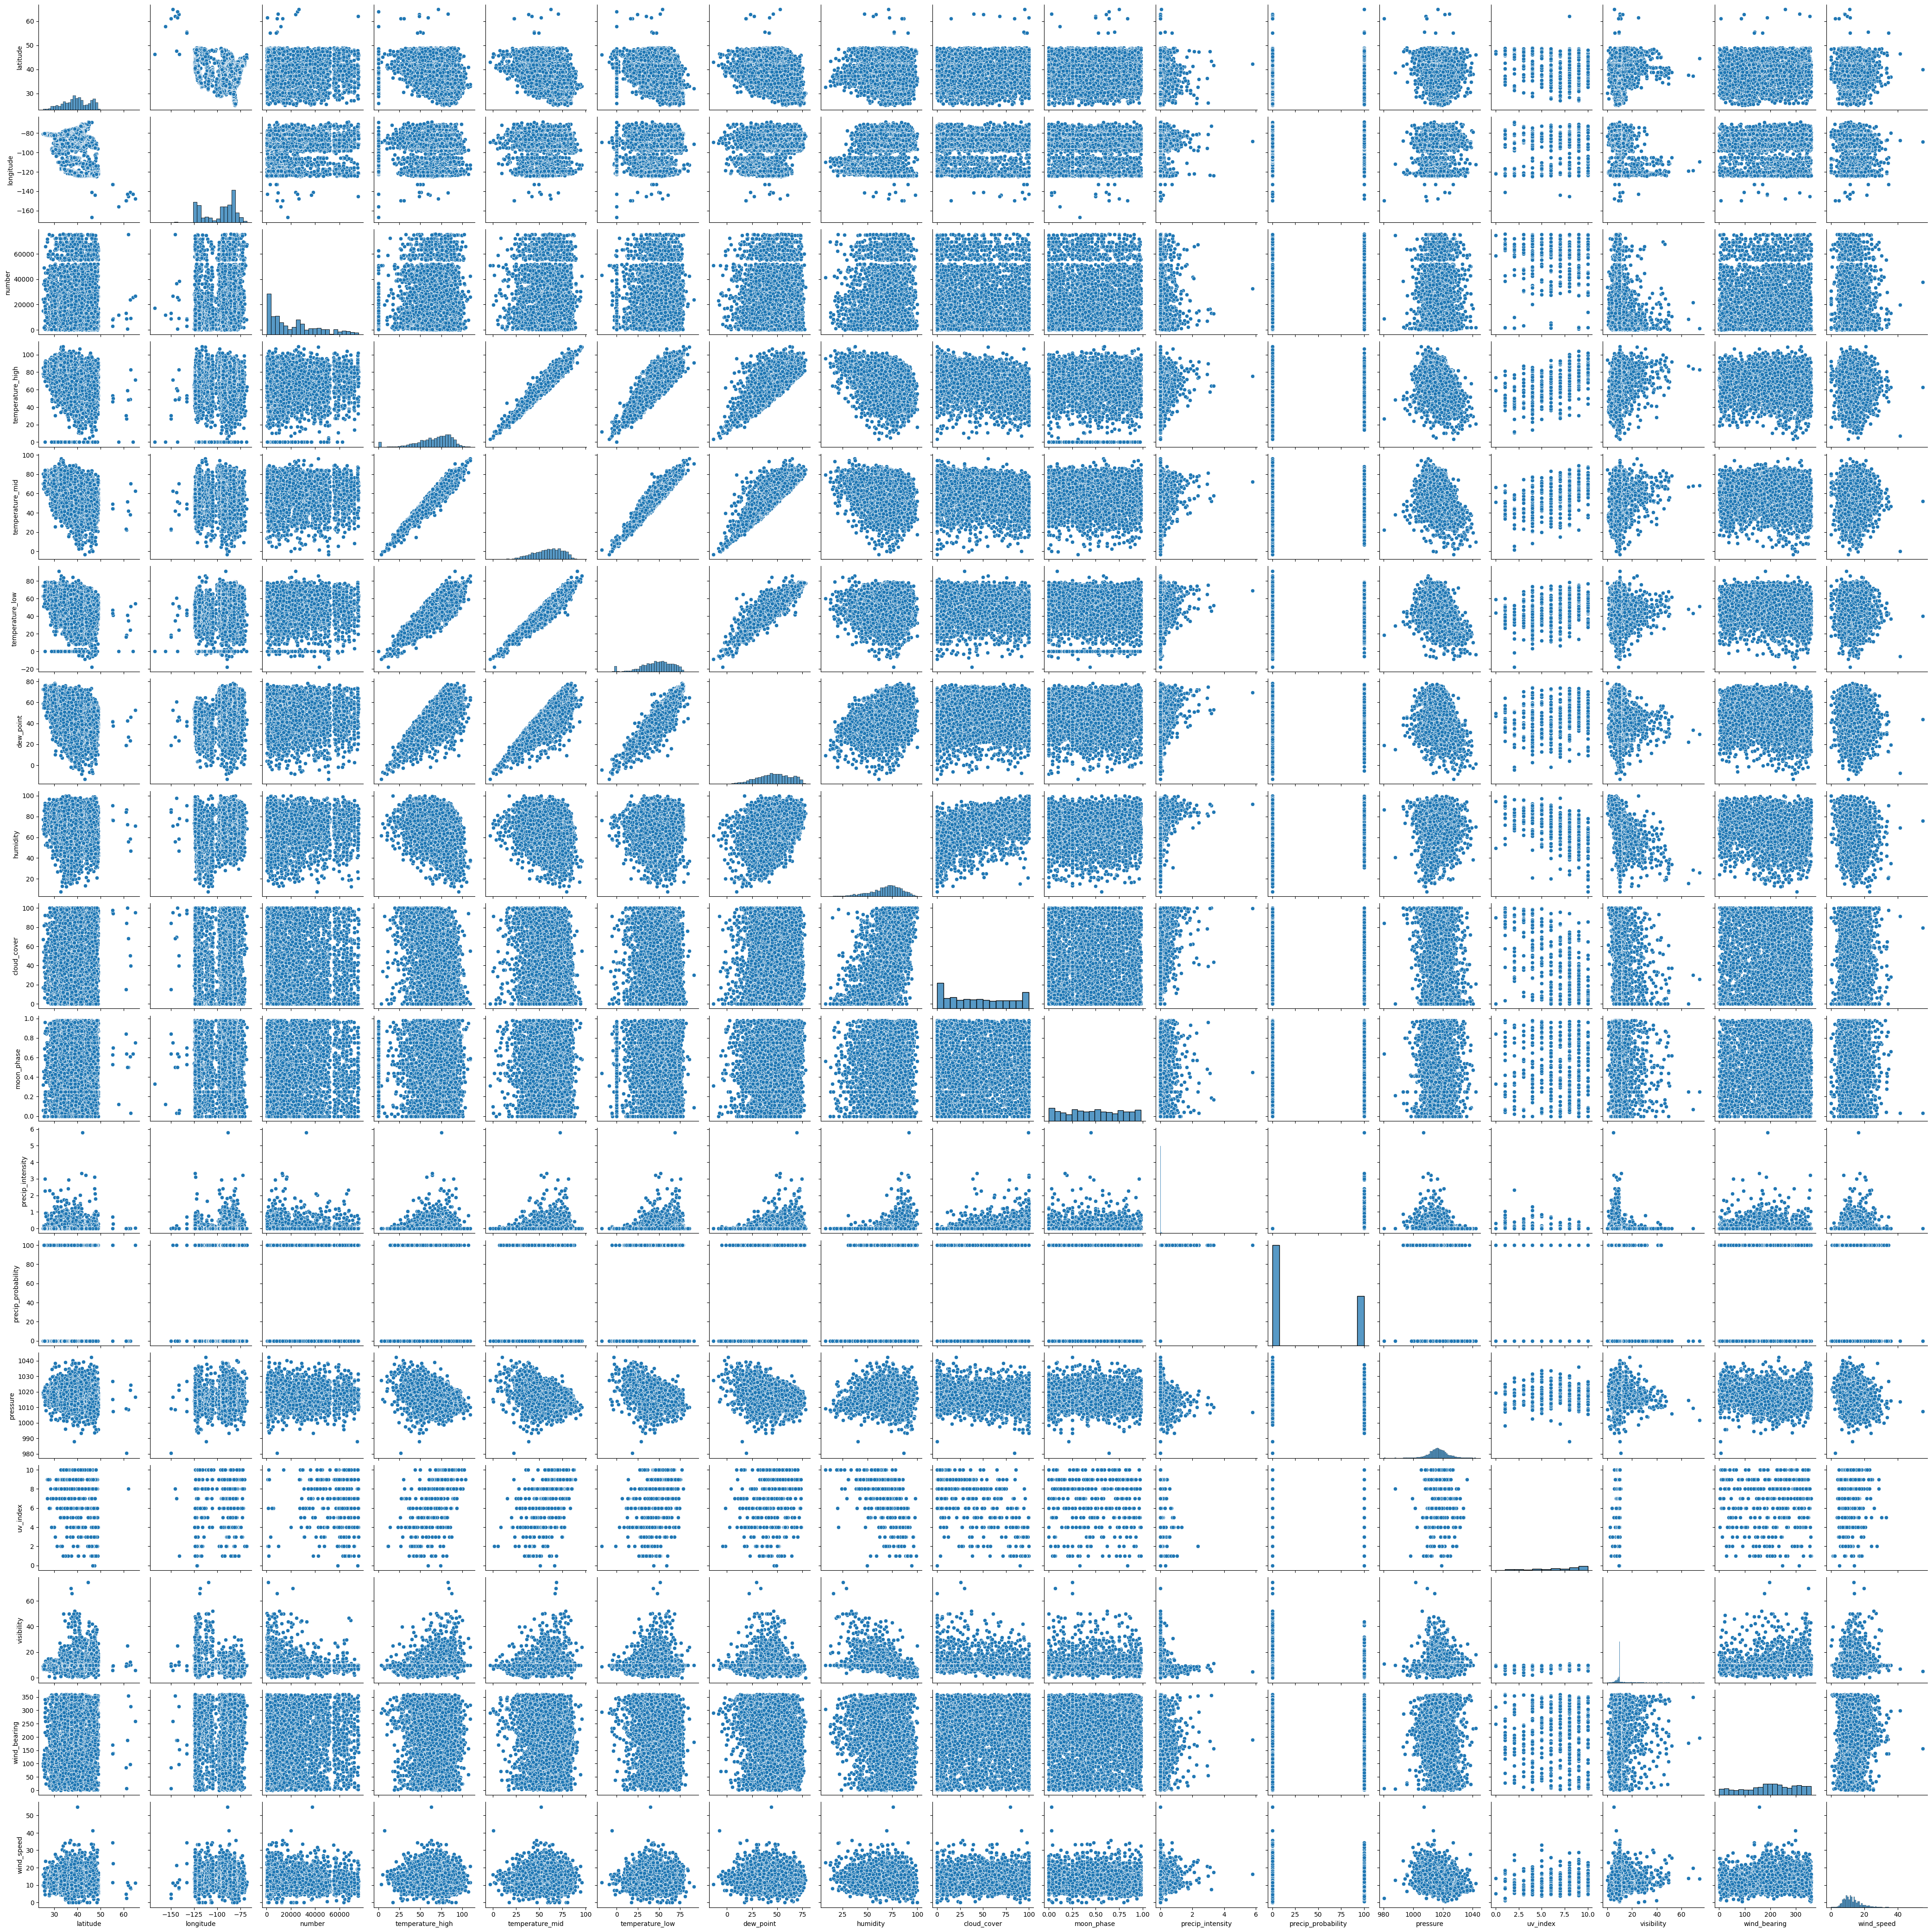

In [5]:
sns.pairplot(data=bigfoot)
plt.show()

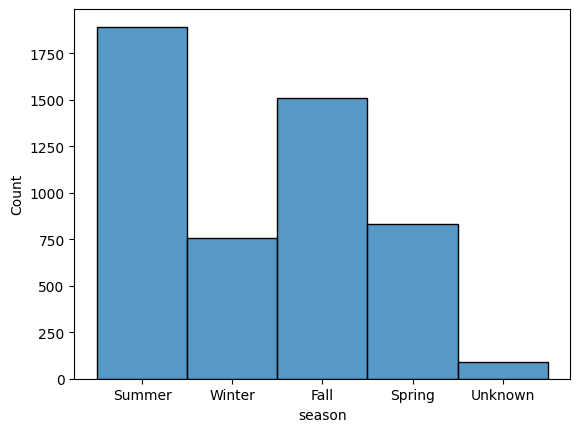

In [6]:
sns.histplot(data=bigfoot, x="season")
plt.show()

Answer to Q1: It appears that most reports occur in the summer, followed by fall, spring, and winter.

## From Homework 7

T-test: test for a difference in mean precip_intensity between visibility < 15 and visibility >= 15

In [7]:
clean_bigfoot = bigfoot.dropna(subset=["visibility","precip_intensity","wind_speed","cloud_cover"])

In [8]:
clean_bigfoot["visibility_level"] = "low"
clean_bigfoot.loc[clean_bigfoot["visibility"] >= 15, "visibility_level"] = "high"

C:\Users\ellis\AppData\Local\Temp\ipykernel_13808\1075292760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_bigfoot["visibility_level"] = "low"


In [9]:
clean_bigfoot.value_counts("visibility_level")

visibility_level
low     3238
high     261
Name: count, dtype: int64

In [10]:
stats.ttest_ind(clean_bigfoot[clean_bigfoot["visibility_level"] == "low"]["precip_intensity"], clean_bigfoot[clean_bigfoot["visibility_level"] == "high"]["precip_intensity"])

Ttest_indResult(statistic=4.058380798854105, pvalue=5.049484928965045e-05)

Pvalue < 0.05, I reject the null hypothesis. There is a difference in mean precip_intensity between visibility < 15 and visibility >= 15.

In [11]:
clean_bigfoot = clean_bigfoot[clean_bigfoot["wind_speed"] < 40]

In [12]:
w_c_reg = stats.linregress(x=clean_bigfoot["wind_speed"], y=clean_bigfoot["cloud_cover"])
w_c_reg

LinregressResult(slope=0.5987319955046626, intercept=37.83561118735115, rvalue=0.08716921821822382, pvalue=2.423551378425401e-07, stderr=0.11572503370660434, intercept_stderr=1.5544139893290851)

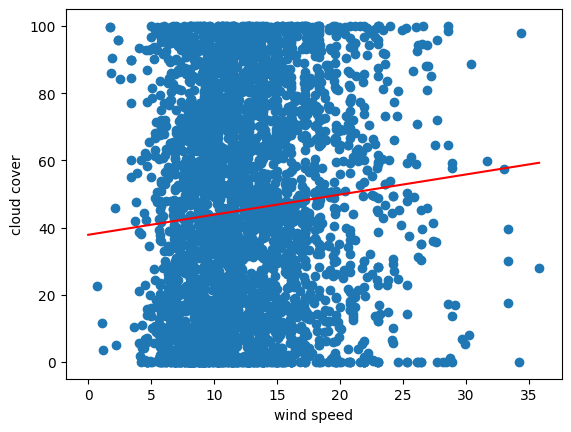

In [13]:
fig, ax = plt.subplots()
x_vals = clean_bigfoot["wind_speed"]
y_vals = clean_bigfoot["cloud_cover"]
line_x = np.linspace(0,max(x_vals))
line_y = line_x * w_c_reg[0] + w_c_reg[1]
ax.scatter(x_vals, y_vals)
ax.plot(line_x, line_y, 'r')
plt.xlabel("wind speed")
plt.ylabel("cloud cover")
plt.show()

Rvalue > 0.05, so the regression results show there is a slight positive correlation between wind speed and cloud coverage, however there seems to be an outlier that scewed the results  
Pvalue < 0.05, that means the slope is non-zero.

#### Linear Regression Model to predict `humidity`

In [14]:
clean_bigfoot.dropna(inplace=True)
test_list = list(filter(lambda x: x!="humidity", clean_bigfoot.select_dtypes("float64").columns.tolist()))

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(clean_bigfoot.loc[:,test_list], clean_bigfoot[["humidity"]], random_state=123)

In [16]:
linreg = linear_model.LinearRegression().fit(X_train, y_train)
print("coefficients:\n", linreg.coef_)

coefficients:
 [[-8.35755912e-02 -9.09881861e-04 -1.01834040e-06  5.98120427e-02
  -2.31396389e+00 -1.18925490e-02  2.33276238e+00  1.21979643e-02
  -5.44683235e-01 -1.47204113e-01  1.76075523e-02 -3.18400324e-02
  -3.49547449e-02 -6.93928380e-01  1.15734849e-03 -4.94676797e-02]]


In [17]:
pd.DataFrame({"variable": X_test.columns, "coefficient": linreg.coef_[0]}).sort_values("coefficient")

variable  coefficient
4      temperature_mid    -2.313964
13          visibility    -0.693928
8           moon_phase    -0.544683
9     precip_intensity    -0.147204
0             latitude    -0.083576
15          wind_speed    -0.049468
12            uv_index    -0.034955
11            pressure    -0.031840
5      temperature_low    -0.011893
1            longitude    -0.000910
2               number    -0.000001
14        wind_bearing     0.001157
7          cloud_cover     0.012198
10  precip_probability     0.017608
3     temperature_high     0.059812
6            dew_point     2.332762

`dew_point` has the biggest effect on humidity predictions

In [18]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [19]:
print("linear regression training score: ", metrics.r2_score(y_train, y_train_pred))
print("linear regression test score: ", metrics.r2_score(y_test, y_test_pred))

linear regression training score:  0.9906134939551821
linear regression test score:  0.9905273819718753


The r2 scores seem to be very high, greater than 0.95. I would recommend my model for predicting humidity based on all other quantitative variables in my dataset.

## Additional Findings

#### I trained a logistic regression model to predict a binary variable `precip_bool`. The variable is `True` if the `precip_type` contains either `snow`, `rain`, or both; else, the variable is set to `False`.

In [20]:
bigfoot["precip_bool"] = False
bigfoot.loc[(bigfoot["precip_type"] == "['rain']") | (bigfoot["precip_type"] == "['snow']")| (bigfoot["precip_type"] == "['rain', 'snow']"), "precip_bool"] = True
bigfoot.precip_bool.value_counts()

precip_bool
False    3773
True     1309
Name: count, dtype: int64

In [21]:
test_list = list(filter(lambda x: x!="precip_type", bigfoot.select_dtypes("float64").columns.tolist()))
test_list

['latitude',
 'longitude',
 'number',
 'temperature_high',
 'temperature_mid',
 'temperature_low',
 'dew_point',
 'humidity',
 'cloud_cover',
 'moon_phase',
 'precip_intensity',
 'precip_probability',
 'pressure',
 'uv_index',
 'visibility',
 'wind_bearing',
 'wind_speed']

In [22]:
class_bigfoot = bigfoot.dropna(subset=test_list, axis=0)
class_bigfoot.shape, bigfoot.shape

((304, 30), (5082, 30))

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(class_bigfoot.loc[:,test_list], class_bigfoot[["precip_bool"]], random_state=123)

In [24]:
reg = linear_model.LogisticRegression().fit(X_train, y_train)

C:\Users\ellis\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellis\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)
metrics.confusion_matrix(y_test, y_test_pred)

array([[42,  0],
       [ 0, 34]], dtype=int64)

It looks like the model made 42 true positive predictions (There was precipitation) and 34 true negative predictions (There was no precipitation).

In [26]:
reg.score(X_test, y_test_pred)

1.0

The regression score for the test datasets was 1; since the score is so high, it would be reasonable to assume the model overfitted to the test set and may perform poorly with outside data

In [27]:
reg.score(X_train, y_train_pred)

1.0

The regression score for the training datasets are also very high; these scores do seem suspicious, but the high scores may be caused by certain variables having high correlation to the variable that was being predicted

In [28]:
pd.DataFrame({"column" : X_test.columns, "coefficient" : reg.coef_[0]}).sort_values("coefficient")

column  coefficient
1            longitude    -0.103573
12            pressure    -0.059697
3     temperature_high    -0.021041
13            uv_index    -0.004222
14          visibility    -0.003288
4      temperature_mid    -0.001285
9           moon_phase    -0.000300
2               number     0.000314
10    precip_intensity     0.000715
16          wind_speed     0.007142
6            dew_point     0.017339
5      temperature_low     0.018201
7             humidity     0.027081
15        wind_bearing     0.036020
0             latitude     0.038055
8          cloud_cover     0.116426
11  precip_probability     0.388881

`precip_probability` had the largest influence on my prediction

I may not recommend my logistic regression model as it currently is because I have not tested how well the model fits with outside data. My regression scores and confusion matrix show good perfromance, but it is always good to be skeptical.

#### Clustering Models of `latitude` and `longitude` coordinates in the US

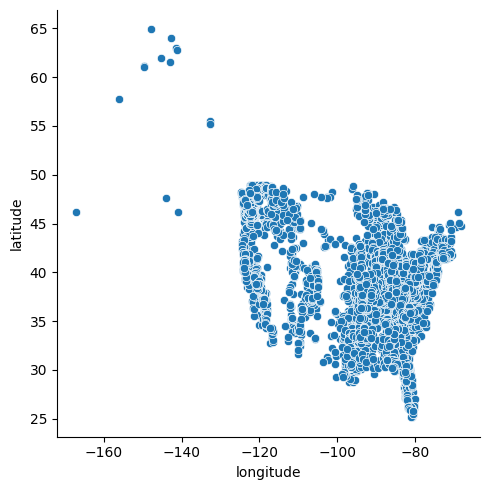

In [29]:
sns.relplot(data=bigfoot, x="longitude", y="latitude")
plt.show()

C:\Users\ellis\AppData\Local\Temp\ipykernel_13808\1826884612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_bigfoot["dbscan"] = dbscan.labels_


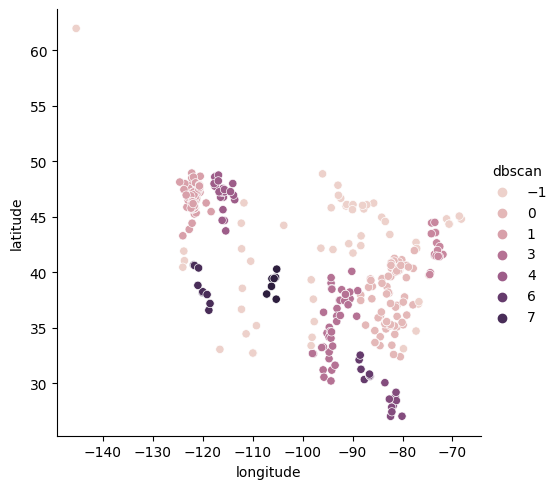

In [30]:
dbscan = cluster.DBSCAN(eps = 2.1, min_samples = 7).fit(class_bigfoot.loc[:,["longitude", "latitude"]])
class_bigfoot["dbscan"] = dbscan.labels_
sns.relplot(data=class_bigfoot, x="longitude", y="latitude", hue = "dbscan")
plt.show()

C:\Users\ellis\miniconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ellis\AppData\Local\Temp\ipykernel_13808\394796402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_bigfoot["kmeans"] = kmeans.labels_


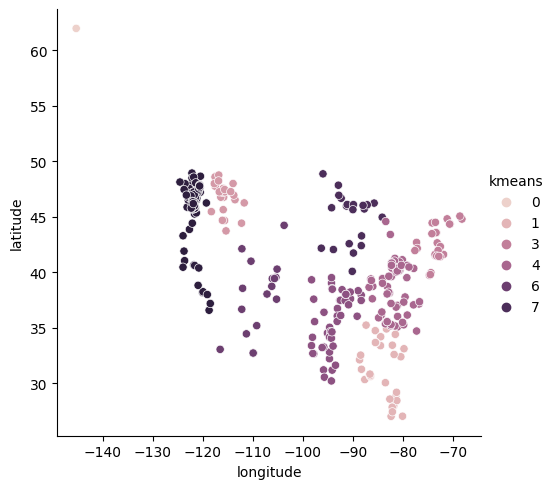

In [31]:
kmeans = cluster.KMeans(n_clusters=9).fit(class_bigfoot.loc[:,["longitude", "latitude"]])
class_bigfoot["kmeans"] = kmeans.labels_
sns.relplot(data=class_bigfoot, x="longitude", y="latitude", hue = "kmeans")
plt.show()

C:\Users\ellis\AppData\Local\Temp\ipykernel_13808\653380993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_bigfoot["agg"] = agg.labels_


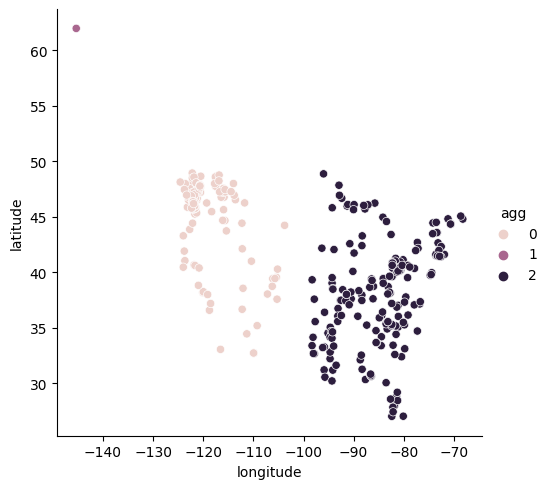

In [32]:
agg = cluster.AgglomerativeClustering(n_clusters=3, linkage="single").fit(class_bigfoot.loc[:,["longitude", "latitude"]])
class_bigfoot["agg"] = agg.labels_
sns.relplot(data=class_bigfoot, x="longitude", y="latitude", hue = "agg")
plt.show()

#### Linear regression statisical test for `temperature_high` against `humidity`

In [33]:
t_h_reg = stats.linregress(x = class_bigfoot["temperature_high"], y = class_bigfoot["humidity"])
t_h_reg

LinregressResult(slope=-0.28433053116084994, intercept=86.40967163661492, rvalue=-0.3100047947575128, pvalue=3.401239430725528e-08, stderr=0.050177739545719205, intercept_stderr=3.5545732652537074)

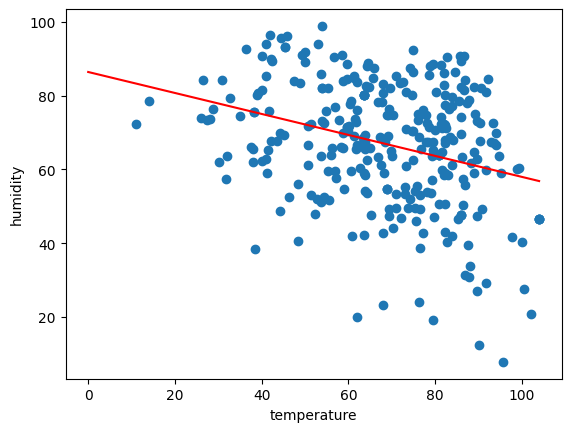

In [34]:
fig, ax = plt.subplots()
x_vals = class_bigfoot["temperature_high"]
y_vals = class_bigfoot["humidity"]
line_x = np.linspace(0,max(x_vals))
line_y = line_x * t_h_reg[0] + t_h_reg[1]
ax.scatter(x_vals, y_vals)
ax.plot(line_x, line_y, 'r')
plt.xlabel("temperature")
plt.ylabel("humidity")
plt.show()

The r-value is between -1 and 0, which means temperature has a negative correlation to humidity, which is supported by the p-value being less than 0.05.

### Conclusions

I learned that the most frequent bigfoot sightings occured most during summers, followed by fall, spring, and winter.  
I also learned that there is a difference in mean `precipitation intensity` between `visibility < 15` miles and `visibility >= 15` miles.  
I ran a linear regression test on `wind speed` and `cloud coverage`, but it seems that r-value is very low, indicating that there is a very weak positive correlation between the two variables.  
I created a linear regression model to predict `humidity` and found that the `dew_point` variable had the greatest affect on that prediction. Also, the linear regression scores for both training and test datasets were above 95%.  
I also created a logistic regression model to predict `precip_bool` which indicates if it rained or not during the bigfoot sighting. I found that the model was most influenced by `precip_probability`, and the logistic regression scores were very high.  
I used k-means clustering, agglomerative clustering, and DBSCAN clustering to find the locations with the most frequent sigthings using the `latitude` and `longitude` variables. However, the sightings were very densely packed together, so at most I found three distinct clusters that separate the general regions of bigfoot sightings.  
Lastly, I ran a linear regression test on `temperature` and `humidity`, and found that there is a slight negative correlation between the two variables.  
Overall, I was abe to answer most of my questions to some degree. For future work, I plan to look into natural language processing for the variables such as `observed`,  `location_details`, and `title`.